In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [3]:
fpath = "cyprus.geojson"
geodata = gpd.read_file(fpath)
geodata['population'] = geodata['population'].apply(lambda x : np.nan if x == 'NA' else float(x))
geodata['district'] = geodata['district'].str.lower()
geodata = geodata.set_index('district')
geodata

,population,area,geometry
district,,,
limassol,239842.0,1393.3,"POLYGON ((33.26712 34.73809, 33.27604 34.71791..."
paphos,90295.0,1389.8,"POLYGON ((32.74372 34.93407, 32.67162 34.96390..."
larnaca,145365.0,1120.1,"POLYGON ((33.12481 34.88480, 33.12653 34.85213..."
nicosia,334120.0,2710.0,"POLYGON ((32.93495 35.26356, 32.89444 35.17212..."
kerynia,NaN,643.89999999999998,"POLYGON ((33.54710 35.28318, 33.60168 35.31541..."
famagusta,47338.0,1985.3,"POLYGON ((33.64700 35.35770, 33.64426 35.32521..."
british overseas territory (akrotiri),NaN,NA,"POLYGON ((32.75574 34.65129, 32.83951 34.66710..."
british overseas territory (dhekelia),NaN,NA,"POLYGON ((33.70605 34.97600, 33.74176 34.97825..."


In [4]:
total = geodata['population'].sum()
geodata['pop_pct'] = geodata['population'] / total
geodata['pop_pct'] = geodata['pop_pct'].apply(lambda x : 0 if np.isnan(x) else x)
geodata

,population,area,geometry,pop_pct
district,,,,
limassol,239842.0,1393.3,"POLYGON ((33.26712 34.73809, 33.27604 34.71791...",0.279875
paphos,90295.0,1389.8,"POLYGON ((32.74372 34.93407, 32.67162 34.96390...",0.105367
larnaca,145365.0,1120.1,"POLYGON ((33.12481 34.88480, 33.12653 34.85213...",0.169629
nicosia,334120.0,2710.0,"POLYGON ((32.93495 35.26356, 32.89444 35.17212...",0.389890
kerynia,NaN,643.89999999999998,"POLYGON ((33.54710 35.28318, 33.60168 35.31541...",0.000000
famagusta,47338.0,1985.3,"POLYGON ((33.64700 35.35770, 33.64426 35.32521...",0.055239
british overseas territory (akrotiri),NaN,NA,"POLYGON ((32.75574 34.65129, 32.83951 34.66710...",0.000000
british overseas territory (dhekelia),NaN,NA,"POLYGON ((33.70605 34.97600, 33.74176 34.97825...",0.000000


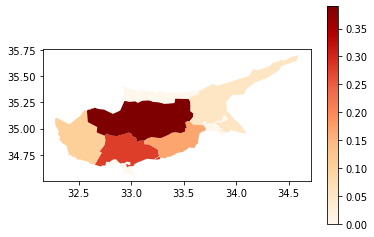

In [5]:
fig, ax = plt.subplots(1, 1)
geodata.plot(column="pop_pct", ax=ax, legend=True, cmap='OrRd')